In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
import numpy as np

In [2]:
project_dir = Path.cwd().parent
delay_df = pd.read_csv(project_dir / "data" / "transformed" / "DENG_delays.csv")
delay_df['Collection date'] = pd.to_datetime(delay_df['Collection date'])
delay_df = delay_df[
    (delay_df['Collection date'] < pd.Timestamp("2022-01-01")) &
    (delay_df['Collection date'] >= pd.Timestamp("2013-01-01"))
]

delay_df.index = delay_df['Collection date']
delay_df = delay_df.drop(columns=['Collection date'])

complete_df = delay_df.copy()

y = delay_df.sum(axis=1)
complete_df['y'] = y
delay_df = delay_df.div(y, axis=0)
cumsum_delay_df = delay_df.cumsum(axis=1)
cumsum_delay_df


,delay_0,delay_1,delay_2,delay_3,delay_4,delay_5,delay_6,delay_7,delay_8,delay_9,...,delay_30,delay_31,delay_32,delay_33,delay_34,delay_35,delay_36,delay_37,delay_38,delay_39
Collection date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.055529,0.199079,0.372939,0.523521,0.579292,0.604510,0.711688,0.776673,0.821775,0.852328,...,0.983269,0.986421,0.988603,0.989816,0.993210,0.996363,0.997333,0.998788,1.000000,1.0
2013-01-02,0.106684,0.274443,0.417562,0.491743,0.536042,0.661337,0.731586,0.797641,0.844037,0.874967,...,0.977195,0.979292,0.982700,0.988204,0.992661,0.995282,0.996855,0.999738,1.000000,1.0
2013-01-03,0.114719,0.297312,0.381155,0.444770,0.598616,0.702954,0.781208,0.840298,0.875699,0.879957,...,0.981900,0.982167,0.990684,0.995209,0.996007,0.997871,0.999201,0.999734,0.999734,1.0
2013-01-04,0.138619,0.238813,0.304961,0.499757,0.626946,0.731274,0.808609,0.858706,0.868677,0.872325,...,0.982733,0.988570,0.994407,0.995866,0.996839,0.997811,0.998784,0.999270,1.000000,1.0
2013-01-05,0.130126,0.214433,0.392898,0.546621,0.669874,0.762887,0.828179,0.844674,0.852692,0.879725,...,0.990607,0.991982,0.995647,0.997709,0.998855,0.999084,0.999084,0.999313,0.999542,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.167291,0.465668,0.724927,0.915938,0.975031,0.997503,0.997503,0.998335,0.998752,0.998752,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2021-12-28,0.210383,0.587978,0.835519,0.938251,0.993443,0.993989,0.995628,0.996721,0.998361,0.998907,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2021-12-29,0.230371,0.654875,0.851596,0.993097,0.994823,0.995686,0.998274,0.999137,0.999137,0.999137,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [3]:
# project_dir = Path.cwd().parent
# delay_df = pd.read_csv(project_dir / "data" / "model" / "complete_data.csv", index_col=0)
# y = delay_df.sum(axis=1)
# delay_df = delay_df.div(y, axis=0)
# cumsum_delay_df = delay_df.cumsum(axis=1)
# cumsum_delay_df

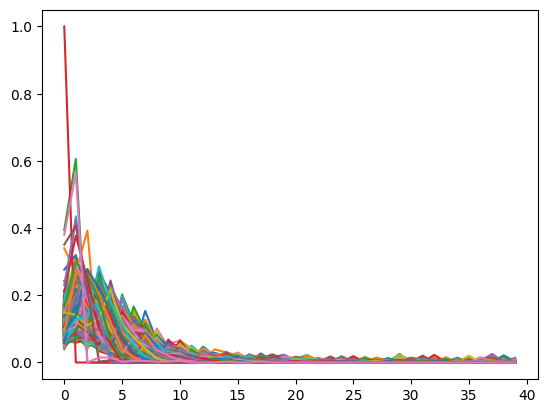

In [4]:


MAX_DELAY = 40



for t in range(len(delay_df)):
    row = delay_df.iloc[t]
    plt.plot(list(range(0, MAX_DELAY)), row)
plt.show()


In [5]:
delay_df

,delay_0,delay_1,delay_2,delay_3,delay_4,delay_5,delay_6,delay_7,delay_8,delay_9,...,delay_30,delay_31,delay_32,delay_33,delay_34,delay_35,delay_36,delay_37,delay_38,delay_39
Collection date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.055529,0.143550,0.173860,0.150582,0.055771,0.025218,0.107177,0.064985,0.045102,0.030553,...,0.001697,0.003152,0.002182,0.001212,0.003395,0.003152,0.000970,0.001455,0.001212,0.000000
2013-01-02,0.106684,0.167759,0.143119,0.074181,0.044299,0.125295,0.070249,0.066055,0.046396,0.030931,...,0.001048,0.002097,0.003408,0.005505,0.004456,0.002621,0.001573,0.002883,0.000262,0.000000
2013-01-03,0.114719,0.182592,0.083843,0.063615,0.153846,0.104339,0.078254,0.059090,0.035401,0.004259,...,0.000000,0.000266,0.008517,0.004525,0.000799,0.001863,0.001331,0.000532,0.000000,0.000266
2013-01-04,0.138619,0.100195,0.066148,0.194796,0.127189,0.104329,0.077335,0.050097,0.009971,0.003648,...,0.000000,0.005837,0.005837,0.001459,0.000973,0.000973,0.000973,0.000486,0.000730,0.000000
2013-01-05,0.130126,0.084307,0.178465,0.153723,0.123253,0.093013,0.065292,0.016495,0.008018,0.027033,...,0.003666,0.001375,0.003666,0.002062,0.001145,0.000229,0.000000,0.000229,0.000229,0.000458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.167291,0.298377,0.259259,0.191011,0.059093,0.022472,0.000000,0.000832,0.000416,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-28,0.210383,0.377596,0.247541,0.102732,0.055191,0.000546,0.001639,0.001093,0.001639,0.000546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-29,0.230371,0.424504,0.196721,0.141501,0.001726,0.000863,0.002588,0.000863,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


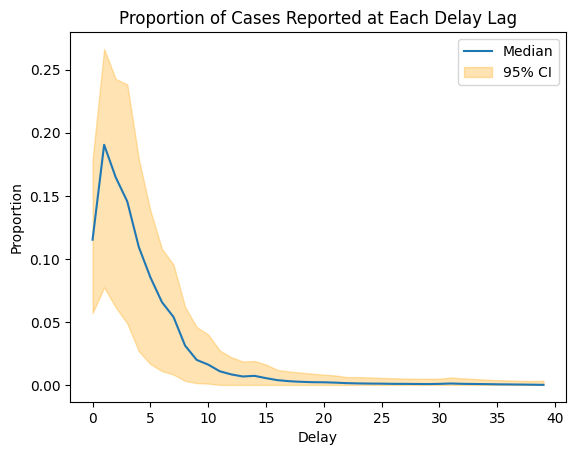

In [6]:
# Confidence intervals
median_ci = np.percentile(delay_df, 50, axis=0)
lower_ci = np.percentile(delay_df, 2.5, axis=0)
upper_ci = np.percentile(delay_df, 97.5, axis=0)

x = list(range(MAX_DELAY))

plt.plot(x, median_ci, label='Median')
plt.fill_between(x, lower_ci, upper_ci, color='orange', alpha=0.3, label='95% CI')

plt.xlabel('Delay')
plt.ylabel('Proportion')
plt.title('Proportion of Cases Reported at Each Delay Lag')
plt.legend()  # <--- this line adds the legend
plt.show()


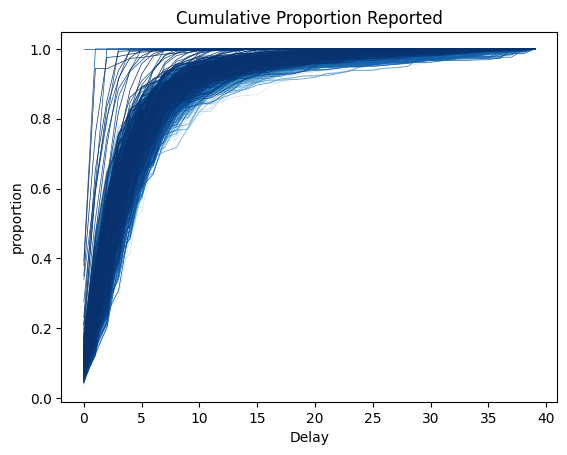

In [7]:
cmap = plt.cm.Blues
n_lines = len(cumsum_delay_df)

for t in range(n_lines):
    row = cumsum_delay_df.iloc[t]
    color = cmap(t / (n_lines - 1))
    plt.plot(list(range(0, MAX_DELAY)), row, color=color, lw=0.5)
plt.xlabel("Delay")
plt.ylabel("proportion")
plt.title("Cumulative Proportion Reported")
plt.show()

## Assess when a certain proportion of cases have been reported 

e.g after what delay were 50% of cases reported, see if this changes over time or looks to be imapcted by the total case count.

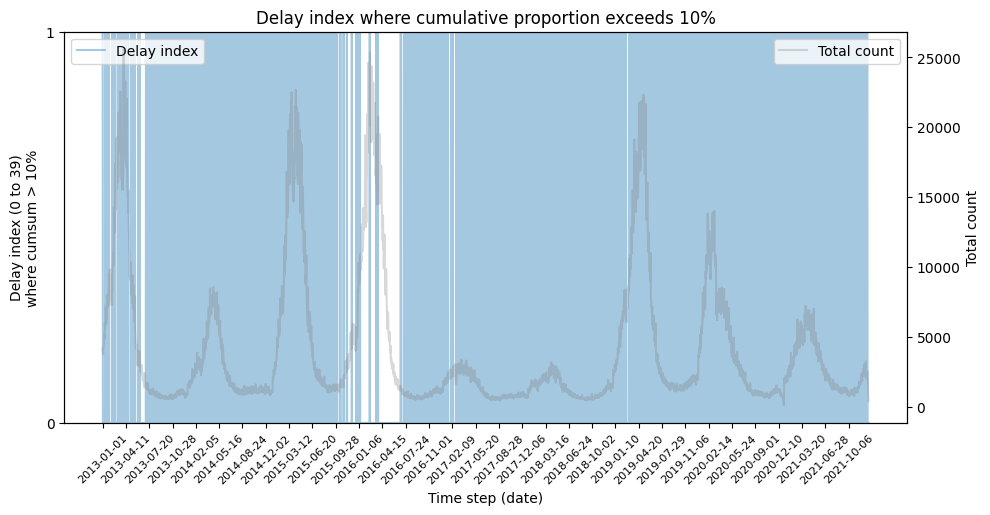

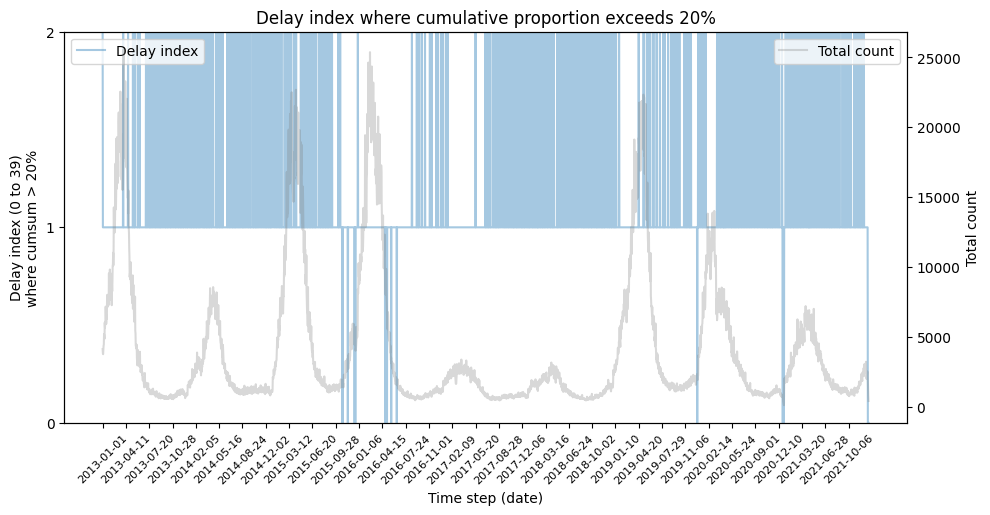

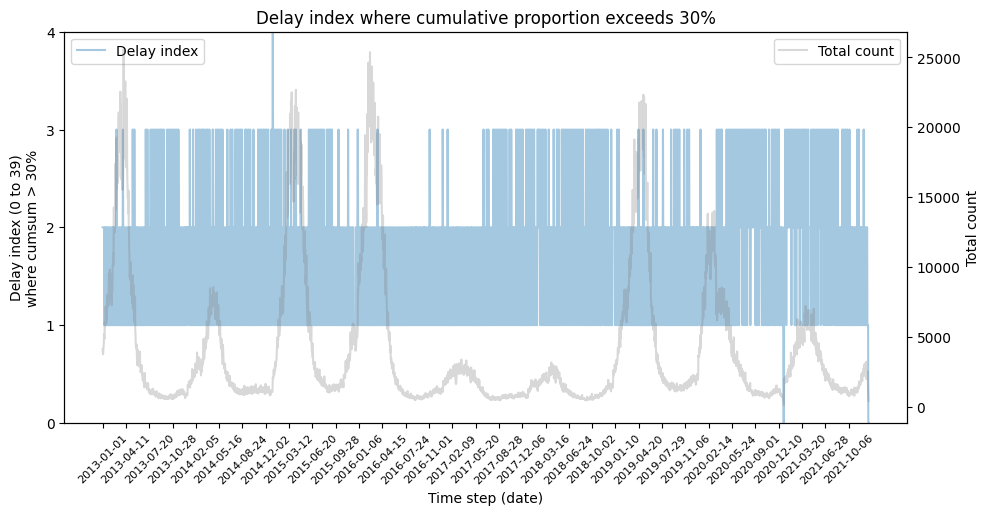

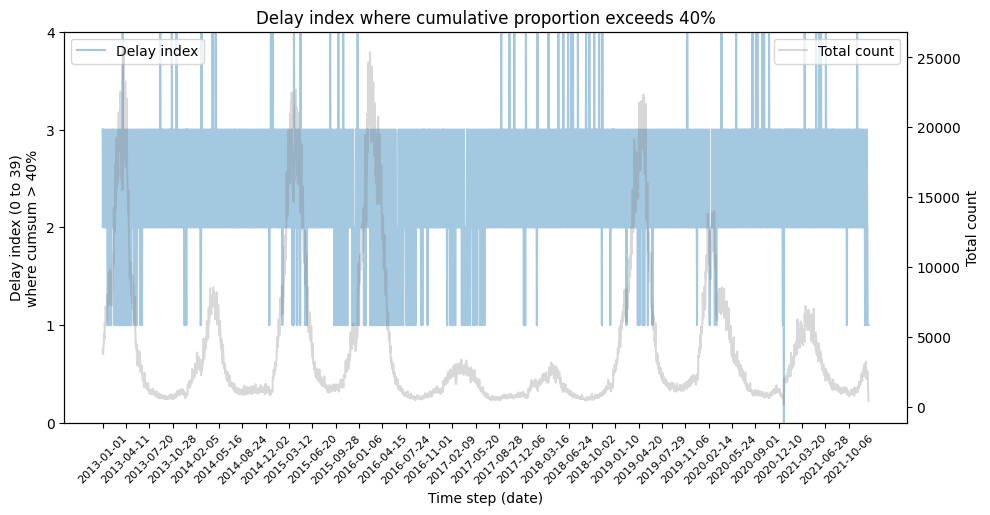

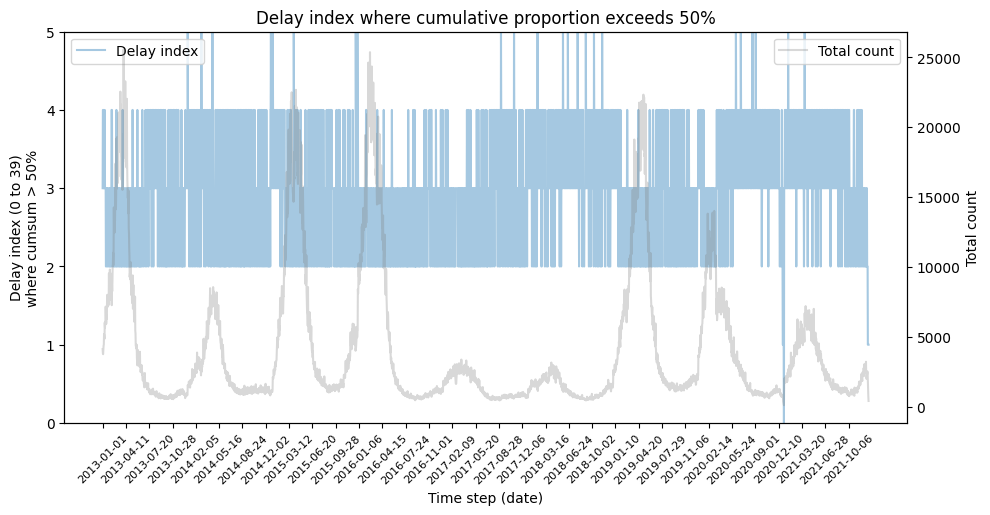

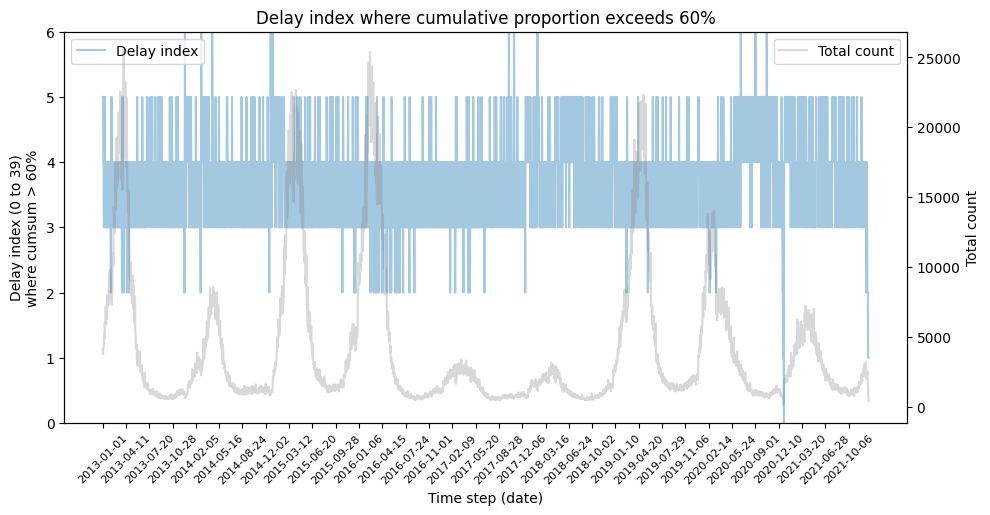

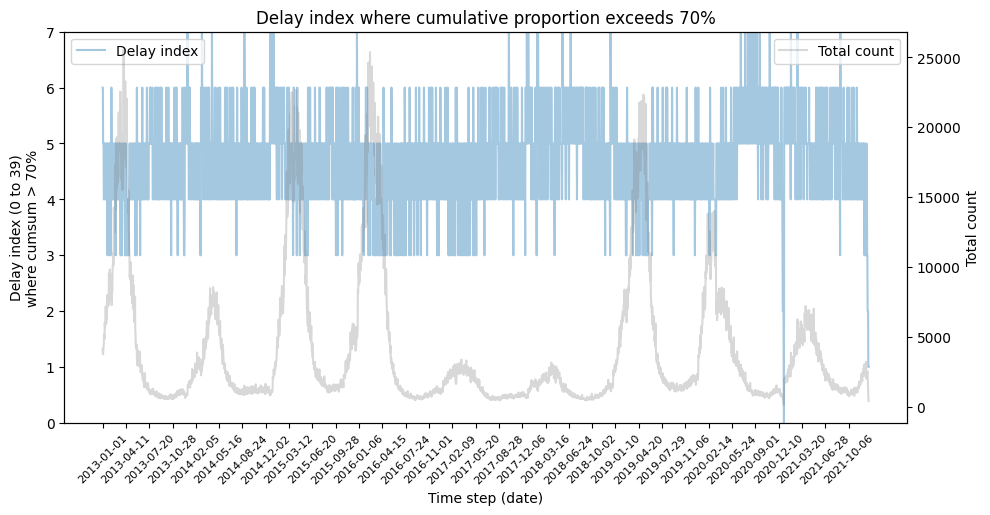

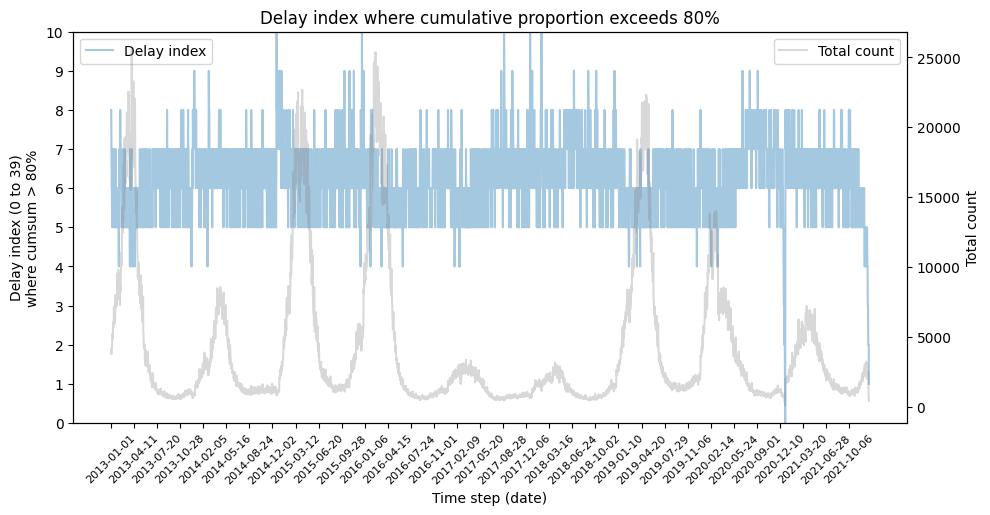

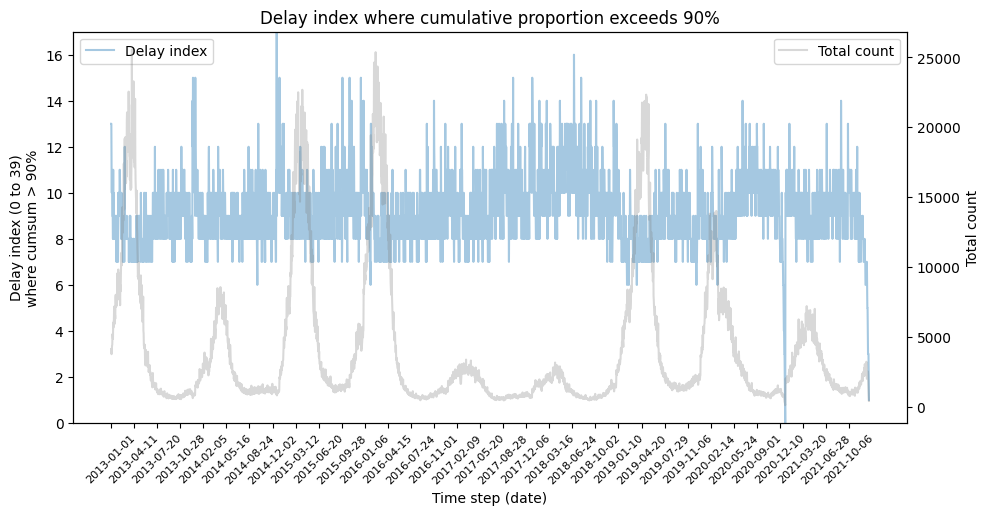

In [8]:
def plot_delay_cumulative_ts(cumsum_per, window=7, total_counts=None):
    cumsum_prop = cumsum_per / 100
    num_delays = cumsum_delay_df.shape[1]

    # For each row, get the first column label where cumsum > cumsum_prop
    first_over_labels = cumsum_delay_df.apply(lambda row: (row > cumsum_prop).idxmax(), axis=1)

    # Convert column labels to integer positions
    col_pos_map = {col: i for i, col in enumerate(cumsum_delay_df.columns)}
    first_over_pos = first_over_labels.map(col_pos_map)

    # Set up figure and axes
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Main plot: delay index
    ax1.plot(first_over_pos.index, first_over_pos.values, alpha=0.4, label='Delay index')
    ax1.set_ylabel(f'Delay index (0 to {num_delays - 1})\nwhere cumsum > {cumsum_prop*100:.0f}%')
    ax1.set_xlabel('Time step (date)')
    ax1.set_ylim(0, max(first_over_pos.values))
    ax1.tick_params(axis='x', labelrotation=45, labelsize=8)
    ax1.legend(loc='upper left')
    ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Background total count plot (if provided)
    if total_counts is not None:
        ax2 = ax1.twinx()
        ax2.plot(total_counts.index, total_counts.values, color='grey', alpha=0.3, label='Total count')
        ax2.set_ylabel('Total count')
        ax2.legend(loc='upper right')

    plt.title(f'Delay index where cumulative proportion exceeds {cumsum_prop*100:.0f}%')
    plt.tight_layout()
    plt.xticks(first_over_pos.index[::100], rotation=45, fontsize=8)
    plt.show()

total_counts = complete_df['y']

for cumsum_prop in range(10, 100, 10):
    plot_delay_cumulative_ts(cumsum_prop, total_counts=total_counts)

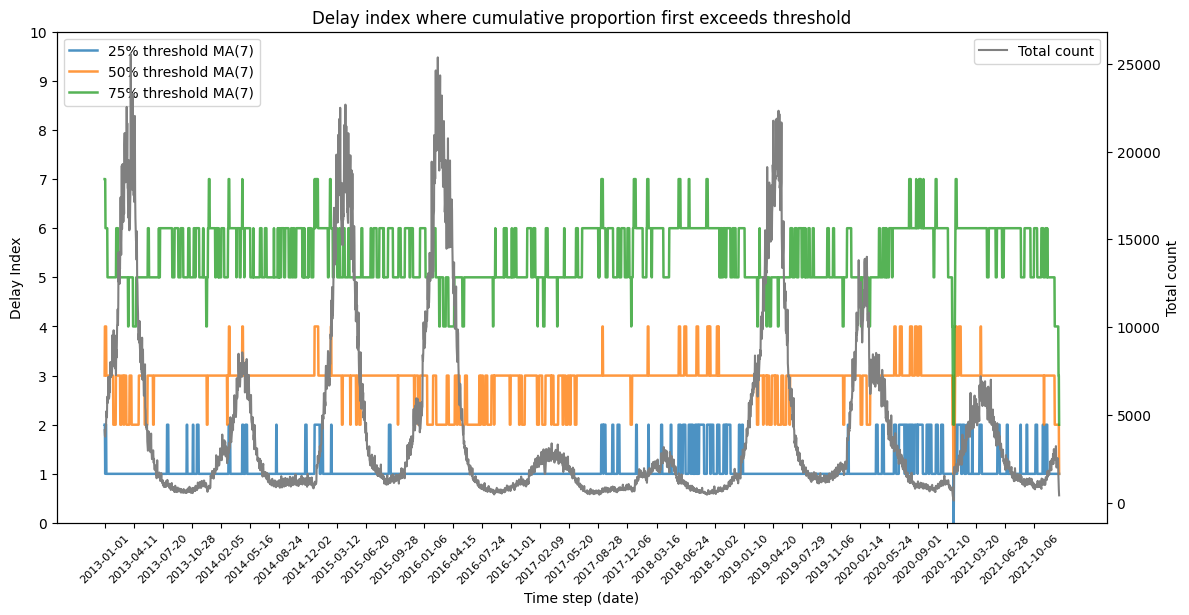

In [9]:
def plot_delay_cumulative_ts_lines(quantiles=[25, 50, 75], window=7, total_counts=None):
    sorted_df = cumsum_delay_df.sort_index()
    num_delays = sorted_df.shape[1]

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Optional: background total count
    if total_counts is not None:
        total_counts_sorted = total_counts.sort_index()
        ax2 = ax1.twinx()
        ax2.plot(total_counts_sorted.index, total_counts_sorted.values, color='grey', alpha=1, label='Total count')
        ax2.set_ylabel('Total count')
        ax2.legend(loc='upper right')

    # Main loop: each threshold in a different color
    for cumsum_per in quantiles:
        cumsum_prop = cumsum_per / 100

        # Compute first delay index where cumulative prop exceeds threshold
        first_over_labels = sorted_df.apply(lambda row: (row > cumsum_prop).idxmax(), axis=1)
        col_pos_map = {col: i for i, col in enumerate(sorted_df.columns)}
        first_over_pos = first_over_labels.map(col_pos_map)

        # Smooth + round
        smoothed_delay_index = first_over_pos.rolling(window=window, min_periods=1).mean().round().astype(int)

        # Plot line
        ax1.plot(smoothed_delay_index.index, smoothed_delay_index.values,
                 label=f'{cumsum_per}% threshold MA({window})', linewidth=1.8, alpha=0.8)

    # Format axes
    ax1.set_ylabel(f'Delay Index')
    ax1.set_xlabel('Time step (date)')
    ax1.set_ylim(0, 10)
    ax1.tick_params(axis='x', rotation=45, labelsize=8)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax1.legend(loc='upper left')

    plt.title(f'Delay index where cumulative proportion first exceeds threshold')
    plt.tight_layout()
    plt.xticks(sorted_df.index[::100], rotation=45, fontsize=8)
    plt.show()

plot_delay_cumulative_ts_lines(quantiles=[25, 50, 75], window=7, total_counts=complete_df['y'])


Cumulative reported proportion does not appear to have any signifiacnt trends over time, although some periodicity

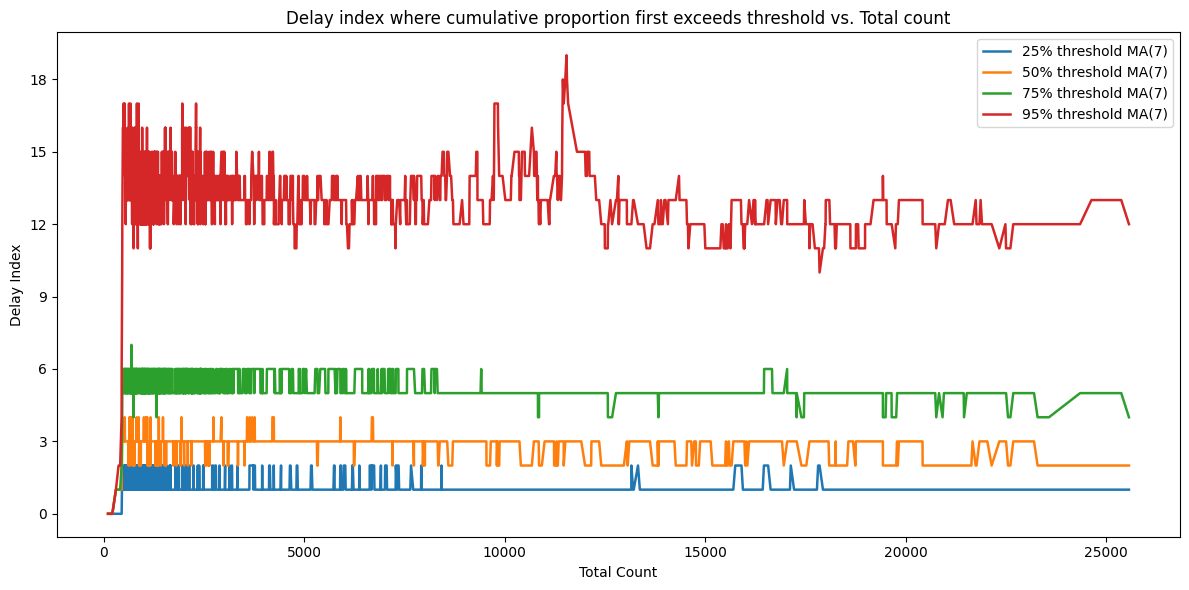

In [10]:
def plot_quantiles_vs_total_count(quantiles=[25, 50, 75], window=7):
    fig, ax = plt.subplots(figsize=(12, 6))

    for q in quantiles:
        cumsum_prop = q / 100

        # Step 1: Get first delay index where cumulative proportion exceeds threshold
        first_over_labels = cumsum_delay_df.apply(lambda row: (row > cumsum_prop).idxmax(), axis=1)

        # Step 2: Map to delay indices
        col_pos_map = {col: i for i, col in enumerate(cumsum_delay_df.columns)}
        first_over_pos = first_over_labels.map(col_pos_map)

        # Step 3: Store in complete_df
        complete_df_temp = complete_df.copy()
        complete_df_temp['q'] = first_over_pos.values

        # Step 4: Sort by total count and apply moving average
        complete_df_temp = complete_df_temp.sort_values(by='y')
        complete_df_temp['q_smooth'] = complete_df_temp['q'].rolling(window=window, min_periods=1).mean().round()

        # Step 5: Plot
        ax.plot(complete_df_temp['y'], complete_df_temp['q_smooth'], label=f'{q}% threshold MA({window})', linewidth=1.8)

    ax.set_xlabel('Total Count')
    ax.set_ylabel('Delay Index')
    ax.set_title(f'Delay index where cumulative proportion first exceeds threshold vs. Total count')
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.legend()
    plt.tight_layout()
    plt.show()


plot_quantiles_vs_total_count(quantiles=[25, 50, 75, 95], window=7)


Higher variance for lower counts than higher counts, no clear relationships between total count and cumiulative delay proportions. Bateched reporting when case counts are lower, fewer resources/ other priorities.

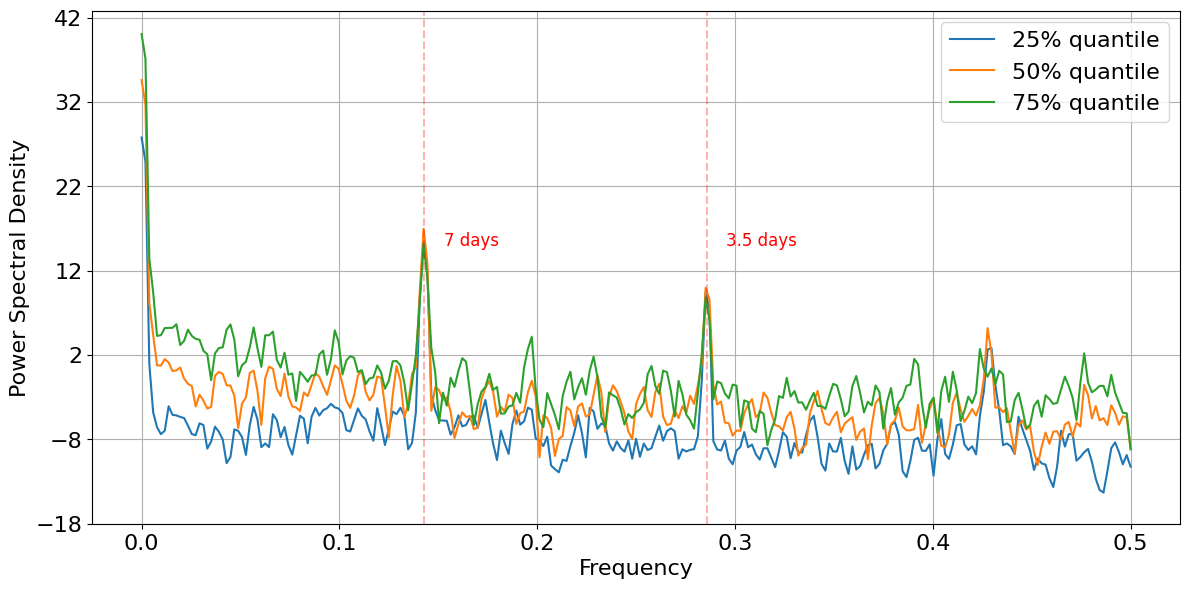

In [12]:
import matplotlib.pyplot as plt

quantiles = [0.25, 0.5, 0.75]
col_pos_map = {col: i for i, col in enumerate(cumsum_delay_df.columns)}

plt.figure(figsize=(12, 6))

for q in quantiles:
    # Find first delay index where cumsum > q
    first_over_labels = cumsum_delay_df.apply(lambda row: (row > q).idxmax(), axis=1)
    first_over_pos = first_over_labels.map(col_pos_map)
    delay_series = first_over_pos.sort_index().values
    
    # Compute periodogram
    Pxx, freqs = plt.psd(delay_series, NFFT=512, Fs=1, label=f'{int(q*100)}% quantile')

plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power Spectral Density', fontsize=16)
plt.legend(fontsize=16, title_fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

for period in [3.5, 7]:
    freq = 1/period
    plt.axvline(x=freq, color='red', linestyle='--', alpha=0.3)
    plt.text(freq + 0.01, 15, f'{period} days', color='red', fontsize=12)

plt.savefig(project_dir / "src" / "outputs" / "visuals" / "delay_periodogram", bbox_inches="tight", dpi=300)

plt.show()
